In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('medical_charge.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# now change the smoker column into a numerical column

df1 = pd.get_dummies(df.smoker,prefix='smoker',drop_first=True)
df1.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [8]:
df_final = pd.concat([df1,df],axis=1)

In [9]:
# will use one hot encoding to convert theregion into a  numerical column
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded=encode.fit_transform(df_final[['region','sex']])


In [10]:
# adding the data into main dataframe and droping the categorical column

df_final[['northeast', 'northwest', 'southeast', 'southwest','female','male']] = encoded
df_final.drop(['region','sex','smoker'],axis=1,inplace=True)

In [11]:
df_final.head()

,smoker_yes,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male
0,1,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0
1,0,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0
2,0,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0
3,0,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0
4,0,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smoker_yes  1338 non-null   uint8  
 1   age         1338 non-null   int64  
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   charges     1338 non-null   float64
 5   northeast   1338 non-null   float64
 6   northwest   1338 non-null   float64
 7   southeast   1338 non-null   float64
 8   southwest   1338 non-null   float64
 9   female      1338 non-null   float64
 10  male        1338 non-null   float64
dtypes: float64(8), int64(2), uint8(1)
memory usage: 106.0 KB


In [113]:
#We can see charger has continuous values by standradization, convert the values in a spacific range



In [13]:
# Find the relationship among the columns

cor = df_final.corr()

print("Correlation among the column is : ",cor)

Correlation among the column is :              smoker_yes       age       bmi  children   charges  northeast  \
smoker_yes    1.000000 -0.025019  0.003750  0.007673  0.787251   0.002811   
age          -0.025019  1.000000  0.109272  0.042469  0.299008   0.002475   
bmi           0.003750  0.109272  1.000000  0.012759  0.198341  -0.138156   
children      0.007673  0.042469  0.012759  1.000000  0.067998  -0.022808   
charges       0.787251  0.299008  0.198341  0.067998  1.000000   0.006349   
northeast     0.002811  0.002475 -0.138156 -0.022808  0.006349   1.000000   
northwest    -0.036945 -0.000407 -0.135996  0.024806 -0.039905  -0.320177   
southeast     0.068498 -0.011642  0.270025 -0.023066  0.073982  -0.345561   
southwest    -0.036945  0.010016 -0.006205  0.021914 -0.043210  -0.320177   
female       -0.076185  0.020856 -0.046371 -0.017163 -0.057292   0.002425   
male          0.076185 -0.020856  0.046371  0.017163  0.057292  -0.002425   

            northwest  southeast  southw

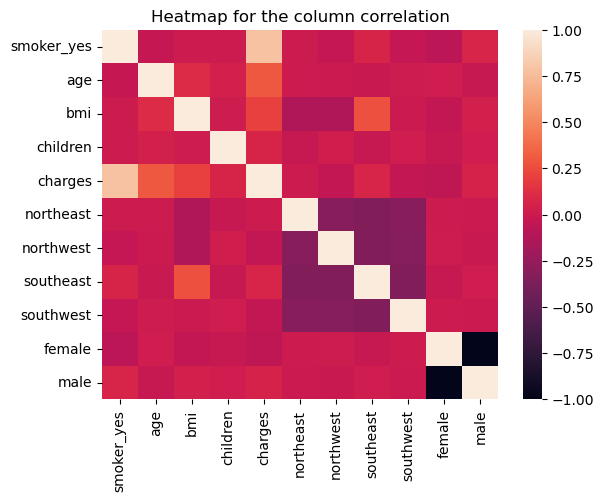

In [14]:
# Graphical representation of the cor relation 

sns.heatmap(cor)
plt.title("Heatmap for the column correlation")
plt.show()

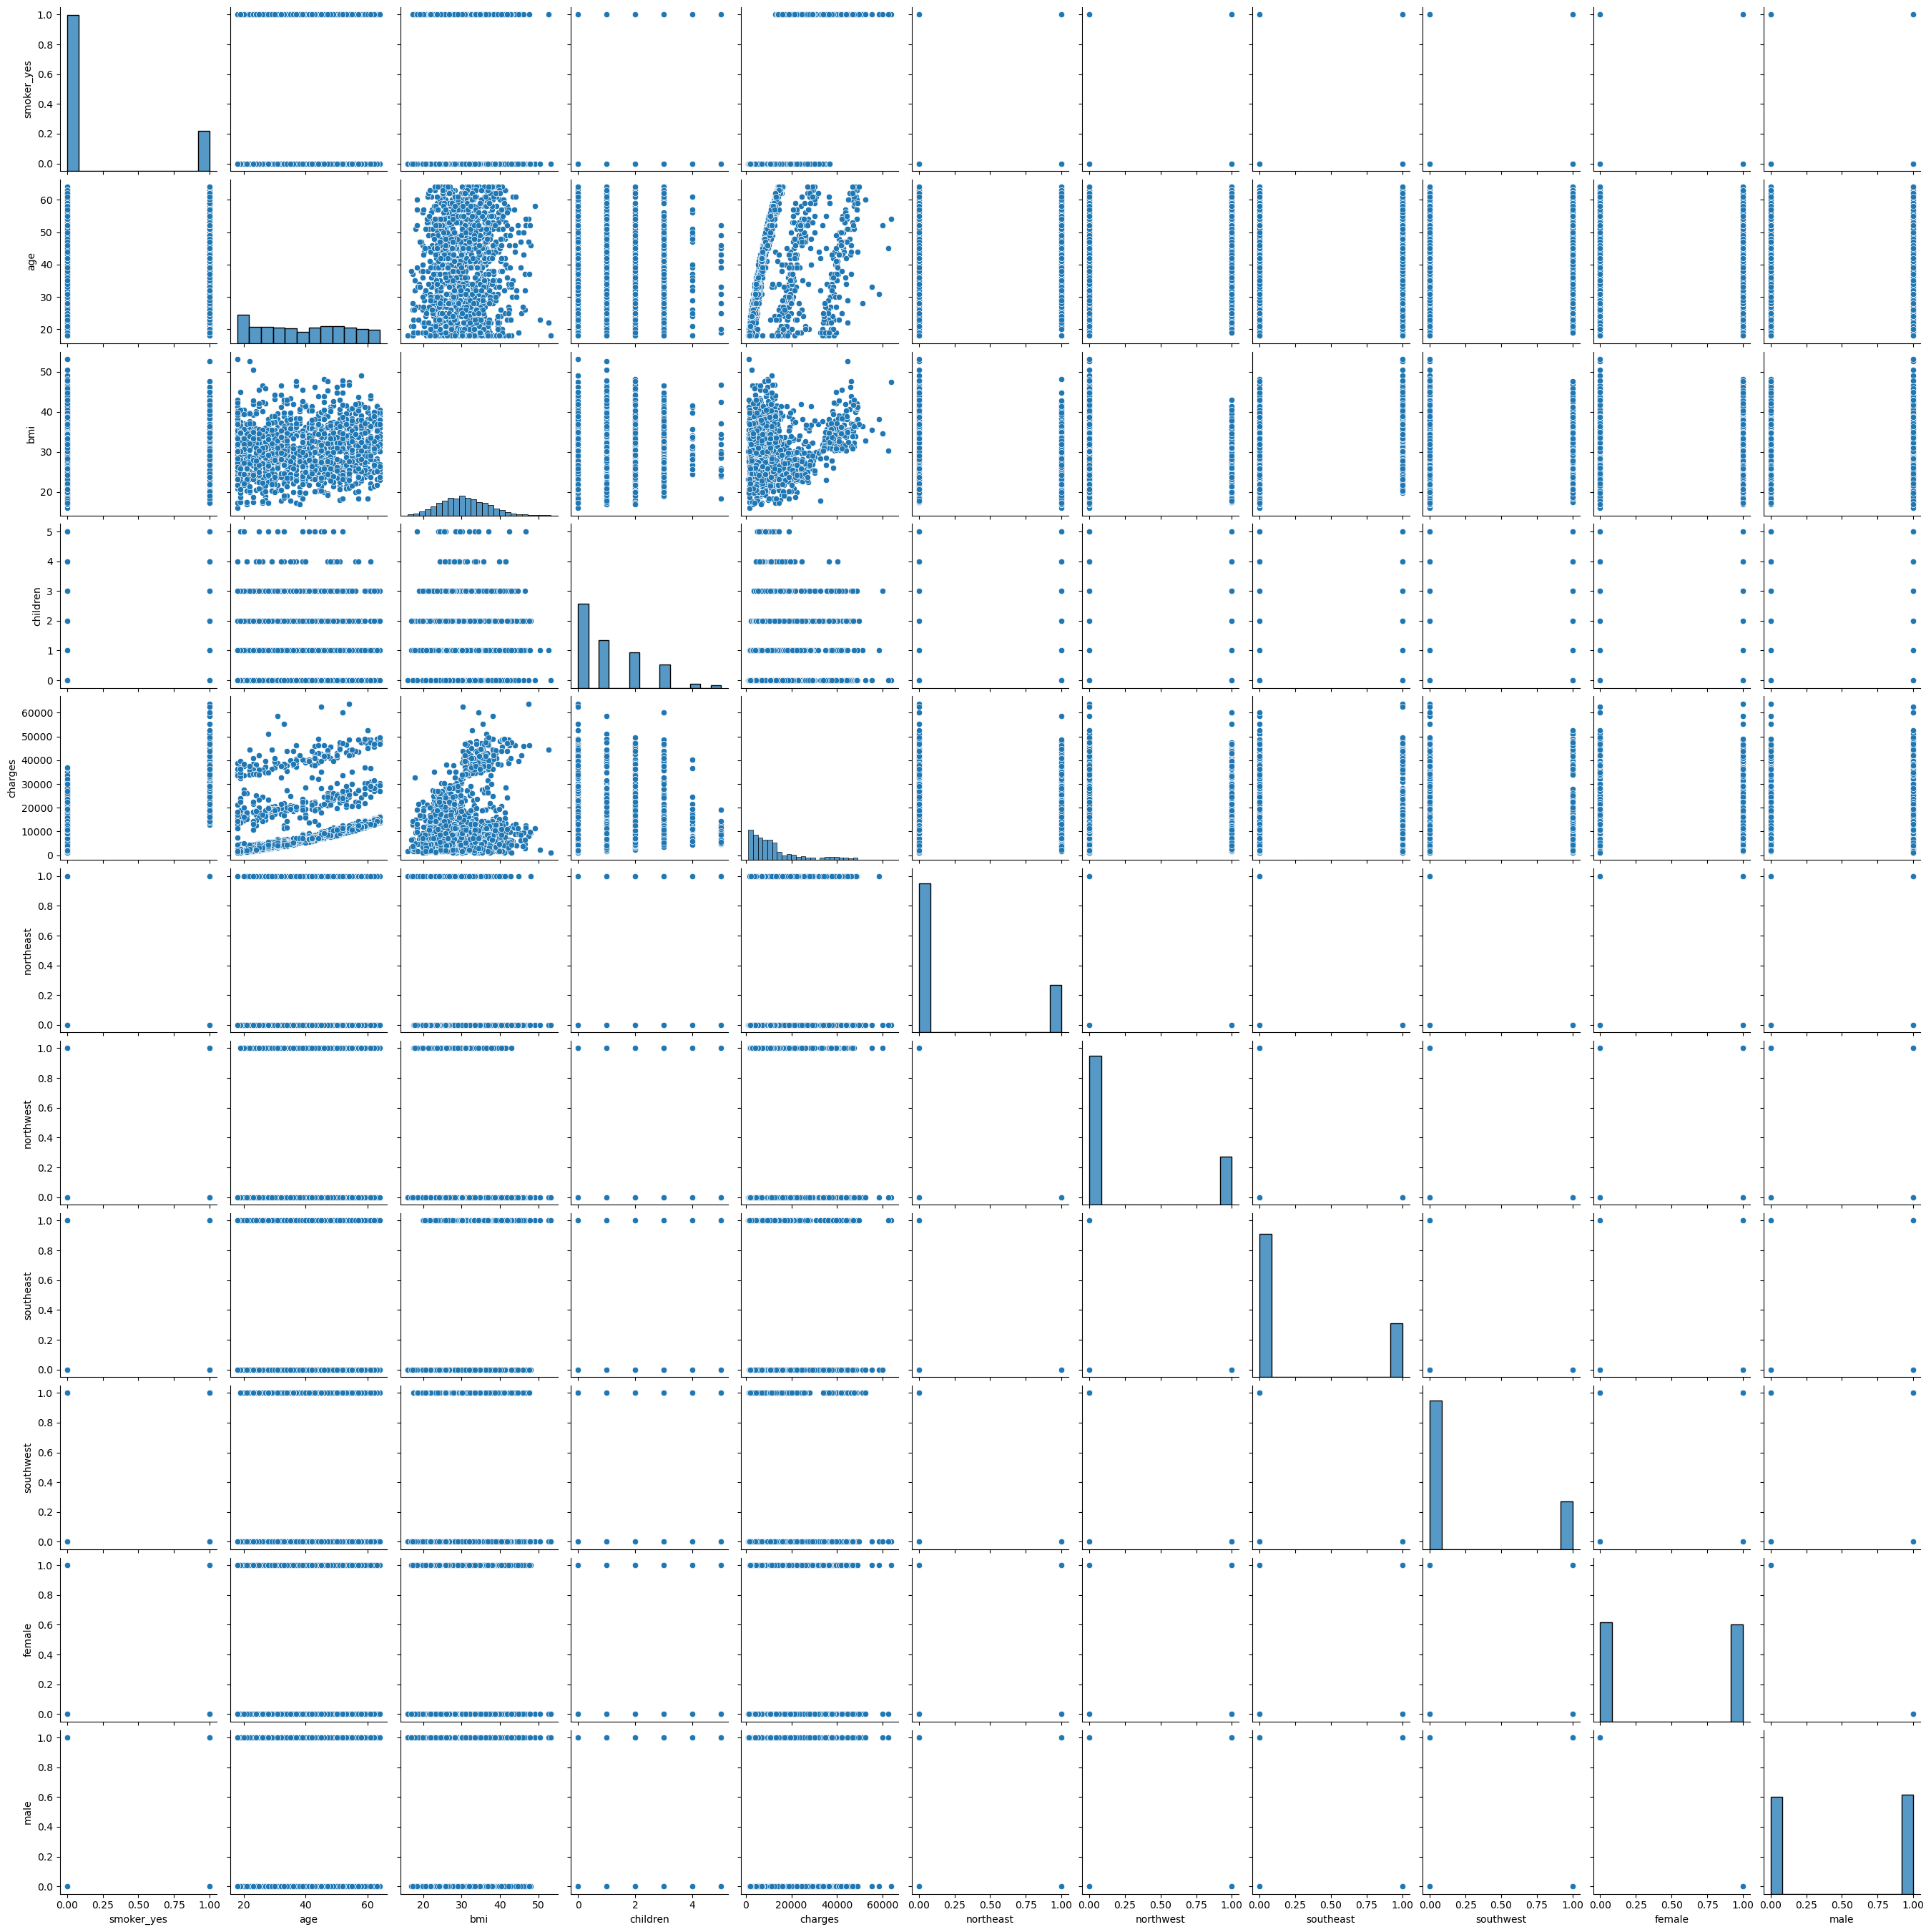

In [15]:
sns.pairplot(df_final)
plt.show()

In [144]:
# As we can see there is no linear relation in childeren ans smoker_yes column

In [16]:
# IT's time to split the data into the X and y 

X= df_final.drop(['charges'],axis=1).values
y=df_final['charges']

In [17]:
print(X.shape)

(1338, 10)


In [18]:
print(y.shape)

(1338,)


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1070, 10)
(268, 10)
(1070,)
(268,)
559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64


In [21]:
#we will apply the Linear regression for the 

from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand_X=stand.fit_transform(X_train)

test_X=stand.fit_transform(X_test)

In [22]:
#makes a gradient desceent function by in which gradient descent calculation will be done

from sklearn.linear_model import SGDRegressor
GD = SGDRegressor()
GD_X=GD.fit(stand_X,y_train)
    


In [26]:
# Now predict the test data value
y_pred = GD_X.predict(test_X)
print(y_pred.ndim)

1


In [27]:
print(y_test.ndim)

1


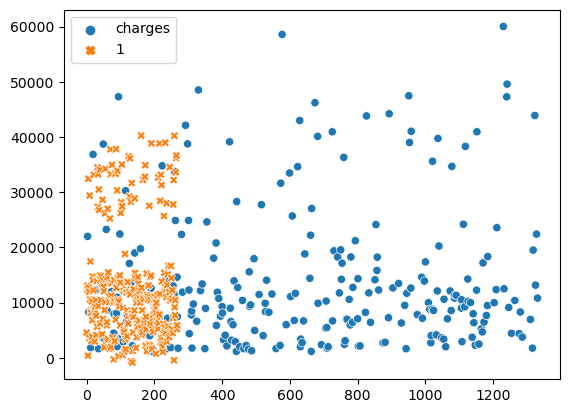

In [29]:
sns.scatterplot((y_test,y_pred))
plt.show()

In [30]:
GD_X.score(test_X,y_pred)

1.0

In [31]:
GD_X.score(test_X,y_test)

0.7626600061812034

In [32]:
GD_X.score(stand_X,y_train)

0.747681417726993

In [33]:
from sklearn import metrics

R2=metrics.r2_score(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("R2 = ",R2)
print("MSE = ",MSE)
print("MAE =",MAE)
print("RMSE =",RMSE)


R2 =  0.7626600061812034
MSE =  35430266.0823404
MAE = 4001.4583293655055
RMSE = 5952.33282691252
